# 一、MMPoseInferencer

In [24]:
from mmpose.apis import MMPoseInferencer

img_path = '../tests/data/coco/000000000785.jpg'   # 将img_path替换给你自己的路径

# 使用模型别名创建推理器
# inferencer = MMPoseInferencer('human')

# 使用模型配置文件和权重文件的路径或 URL 构建推理器
inferencer = MMPoseInferencer(
    pose2d='../td-hm_hrnet-w48_8xb32-210e_coco-256x192.py',
    pose2d_weights='../td-hm_hrnet-w48_8xb32-210e_coco-256x192-0e67c616_20220913.pth'
)

# MMPoseInferencer采用了惰性推断方法，在给定输入时创建一个预测生成器
result_generator = inferencer(img_path, show=False, pred_out_dir='predictions', out_dir='output', draw_bbox=True, skeleton_style="openpose")
result = next(result_generator)

Loads checkpoint by local backend from path: ../td-hm_hrnet-w48_8xb32-210e_coco-256x192-0e67c616_20220913.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth
11/01 01:33:54 - mmengine - INFO - the output image has been saved at output/visualizations/000000000785.jpg


/root/project/research/action/mmpose/mmpose/datasets/datasets/utils.py:102: UserWarning: The metainfo config file "configs/_base_/datasets/coco_openpose.py" does not exist. A matched config file "/root/project/research/action/mmpose/mmpose/.mim/configs/_base_/datasets/coco_openpose.py" will be used instead.
  warnings.warn(


In [27]:
# result

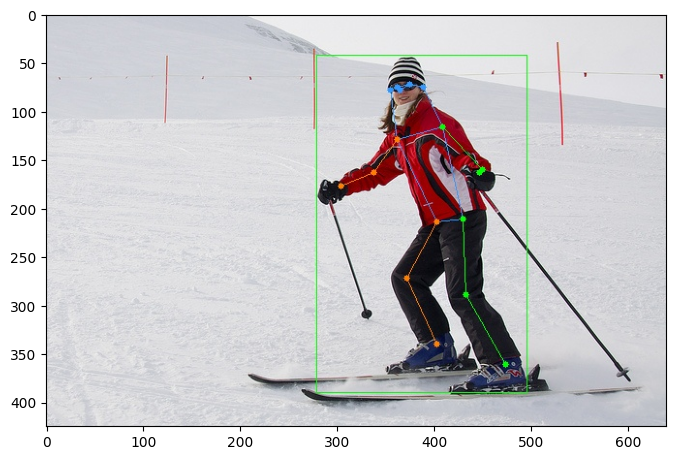

In [22]:
import os
from matplotlib import pyplot as plt
import numpy as np
import cv2

image = cv2.imread("./output/visualizations/000000000785.jpg")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, cmap="gray")

# 二、inference api

In [28]:
from mmcv.image import imread

from mmpose.apis import inference_topdown, init_model
from mmpose.registry import VISUALIZERS
from mmpose.structures import merge_data_samples

model_cfg = '../td-hm_hrnet-w48_8xb32-210e_coco-256x192.py'

ckpt = '../td-hm_hrnet-w48_8xb32-210e_coco-256x192-0e67c616_20220913.pth'

device = 'cuda'

# 使用初始化接口构建模型
model = init_model(model_cfg, ckpt, device=device)

Loads checkpoint by local backend from path: ../td-hm_hrnet-w48_8xb32-210e_coco-256x192-0e67c616_20220913.pth


In [30]:
img_path = '../tests/data/coco/000000000785.jpg'

# 单张图片推理
batch_results = inference_topdown(model, img_path)

------------------ bboxes: None


In [32]:
pred_instances = batch_results[0].pred_instances

pred_instances.keypoints

array([[[365.83334 ,  83.333336],
        [374.16666 ,  75.00001 ],
        [357.5     ,  75.00001 ],
        [390.83334 ,  75.00001 ],
        [357.5     ,  83.333336],
        [407.5     , 108.333336],
        [365.83334 , 116.66667 ],
        [440.83334 , 150.      ],
        [349.16666 , 158.33333 ],
        [449.16666 , 166.66667 ],
        [307.5     , 175.      ],
        [440.83334 , 208.33333 ],
        [399.16666 , 216.66667 ],
        [432.5     , 283.33334 ],
        [374.16666 , 275.      ],
        [474.16666 , 366.66666 ],
        [407.5     , 341.66666 ]]], dtype=float32)